In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

In [34]:
bc=pd.read_csv('Dt.09-09-20_wisc_bc_data.csv')

In [35]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [36]:
bc.shape

(569, 32)

In [37]:
bc.nunique()

id                   569
diagnosis              2
radius_mean          456
texture_mean         479
perimeter_mean       522
area_mean            539
smoothness_mean      474
compactness_mean     537
concavity_mean       537
points_mean          542
symmetry_mean        432
dimension_mean       499
radius_se            540
texture_se           519
perimeter_se         533
area_se              528
smoothness_se        547
compactness_se       541
concavity_se         533
points_se            507
symmetry_se          498
dimension_se         545
radius_worst         457
texture_worst        511
perimeter_worst      514
area_worst           544
smoothness_worst     411
compactness_worst    529
concavity_worst      539
points_worst         492
symmetry_worst       500
dimension_worst      535
dtype: int64

In [38]:
print("We see that the column id has unique value for all the entries, so we drop it as it will not be useful for analysis.")

We see that the column id has unique value for all the entries, so we drop it as it will not be useful for analysis.


In [39]:
bc=bc.drop('id',axis=1)

In [40]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

In [41]:
print("All object types in data are correct. There are no null values in the data.")

All object types in data are correct. There are no null values in the data.


In [42]:
z_col=[]
z_count=0
for i in bc.columns[1:]:
    if bc[i].any()==0:
        z_count+=1
        z_col.append(i)
    
print(z_col)
print(z_count)
    

[]
0


In [43]:
print("There are not zero entries in the data.")

There are not zero entries in the data.


In [44]:
bc.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


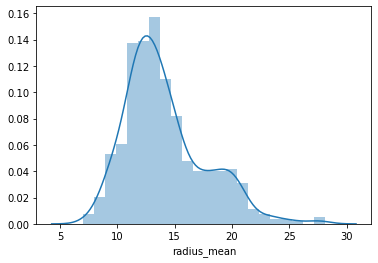

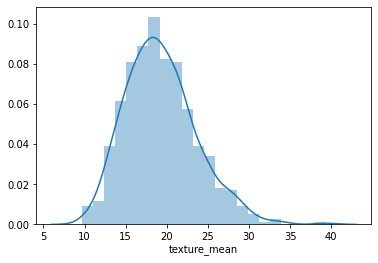

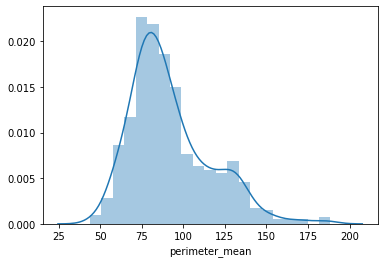

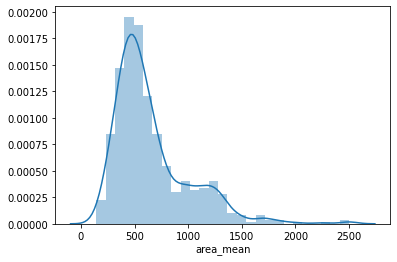

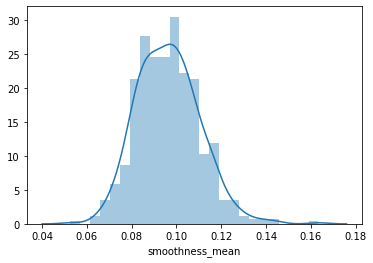

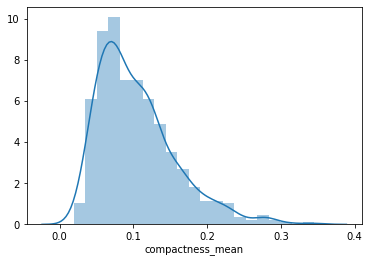

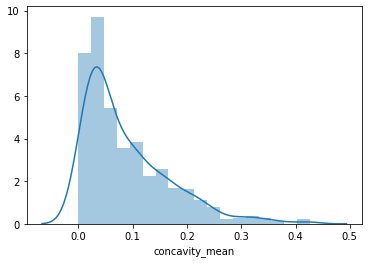

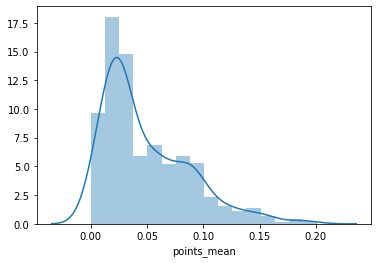

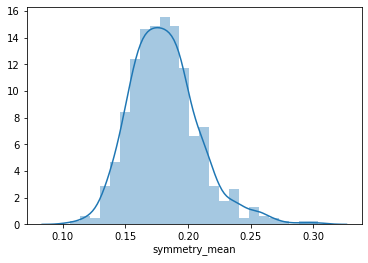

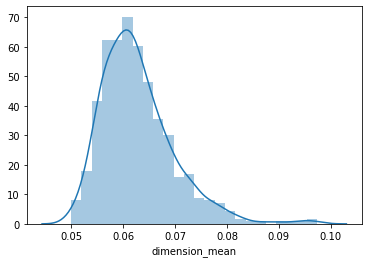

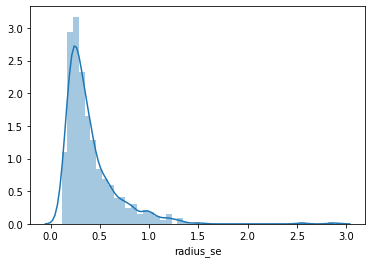

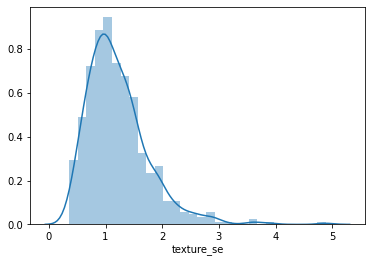

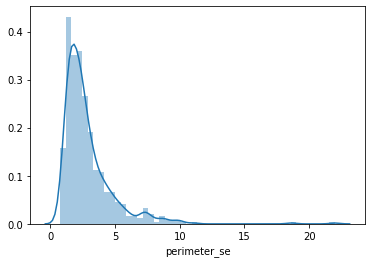

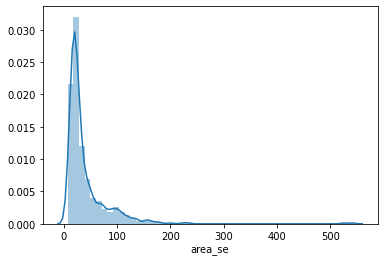

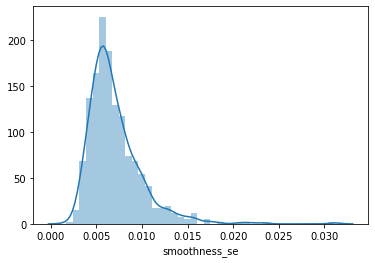

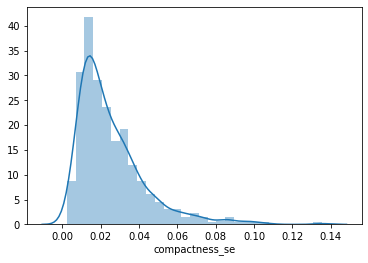

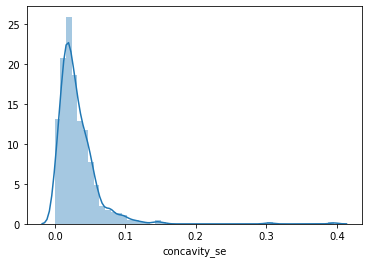

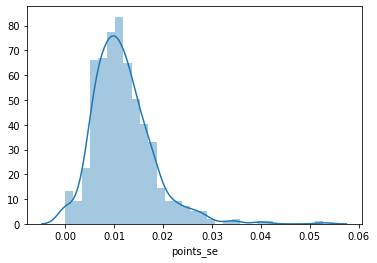

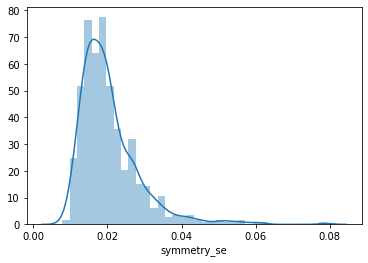

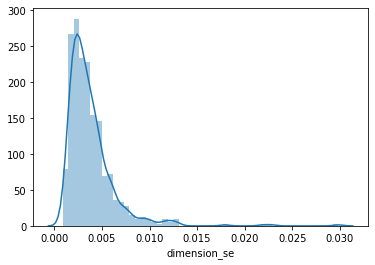

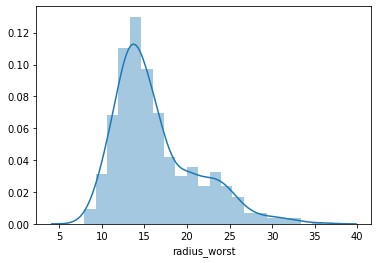

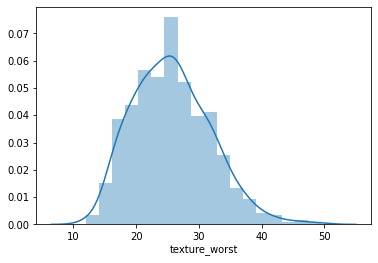

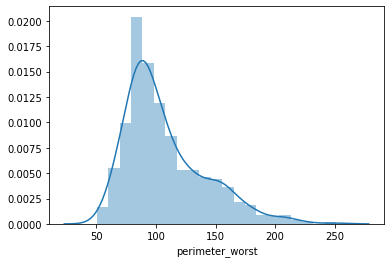

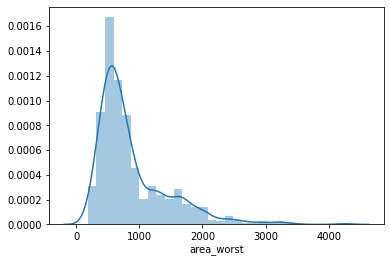

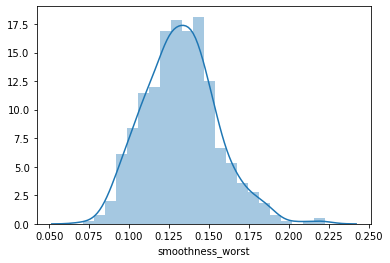

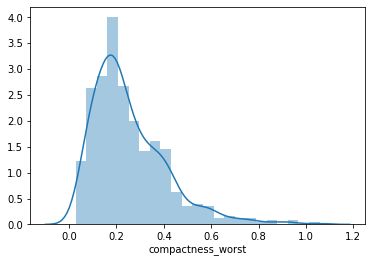

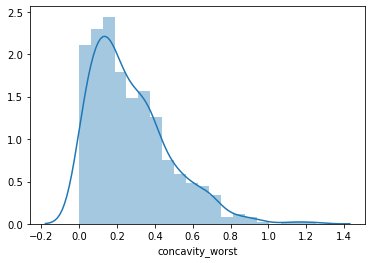

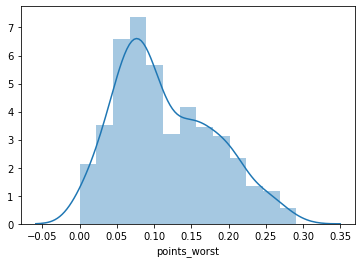

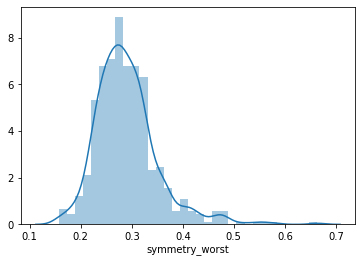

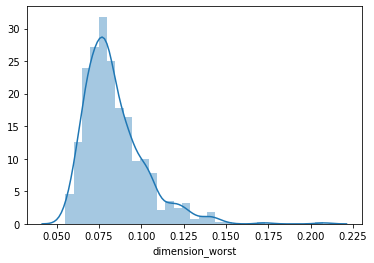

In [45]:
for i in bc.columns[1:]:
    sns.distplot(bc[i])
    plt.show()

In [46]:
print("We see most of the data is slightly right skewed, however the is some element of normality present.")

We see most of the data is slightly right skewed, however the is some element of normality present.


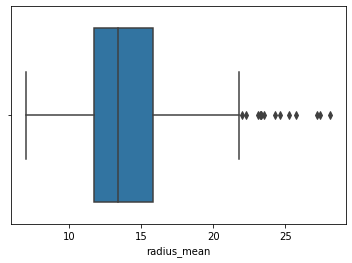

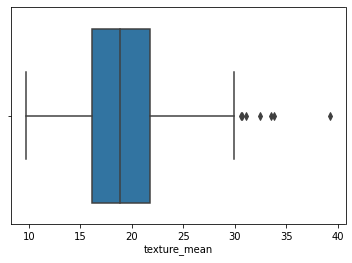

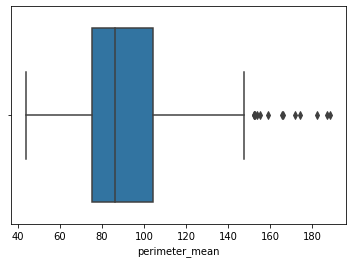

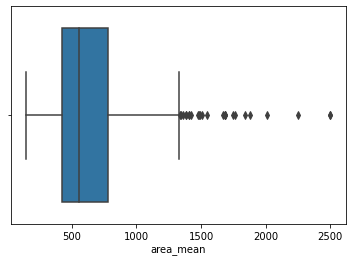

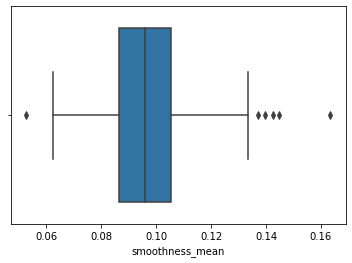

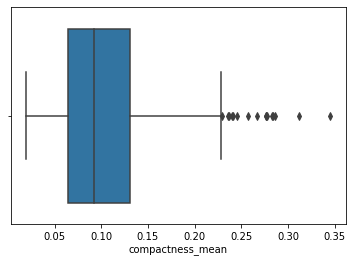

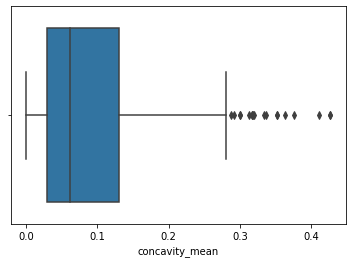

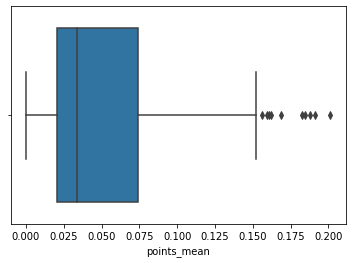

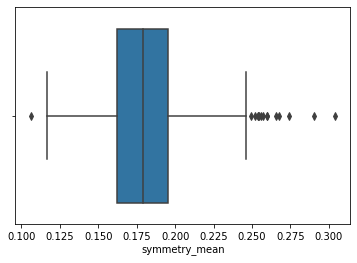

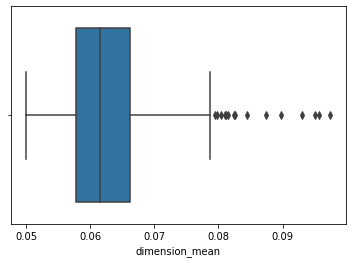

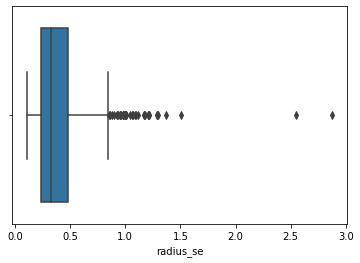

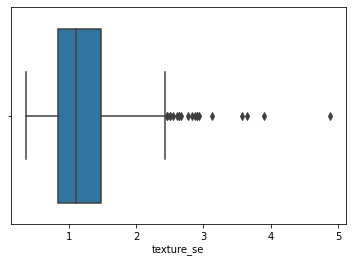

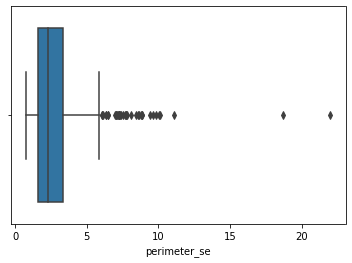

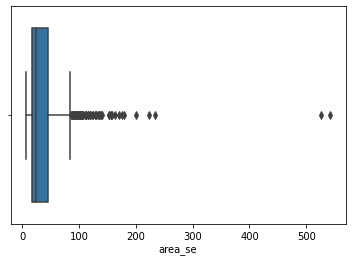

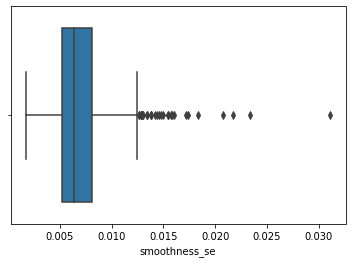

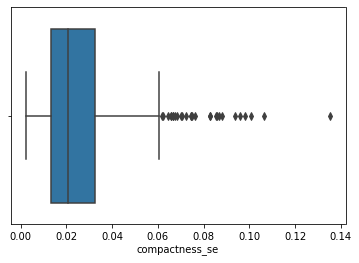

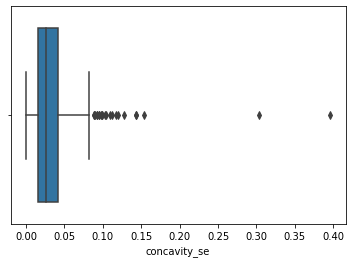

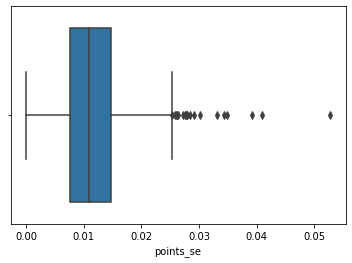

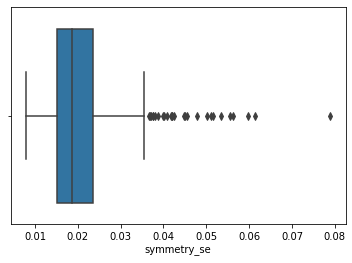

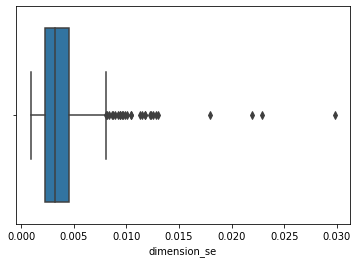

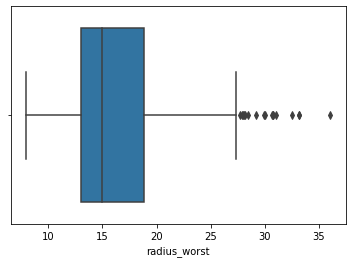

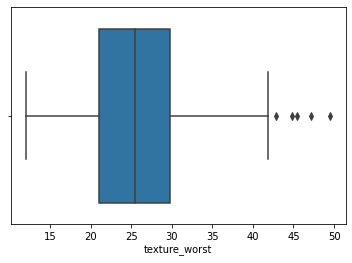

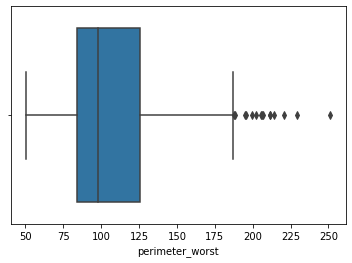

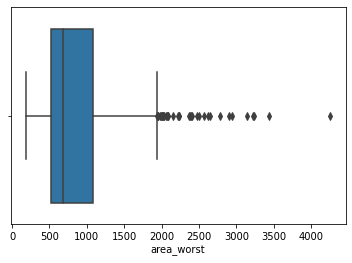

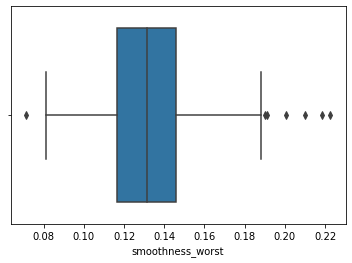

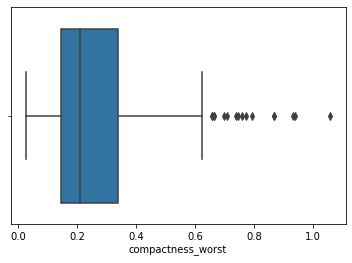

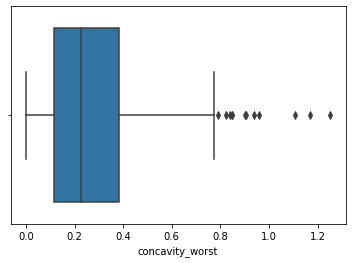

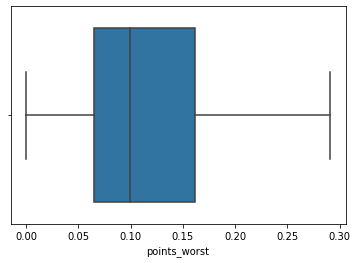

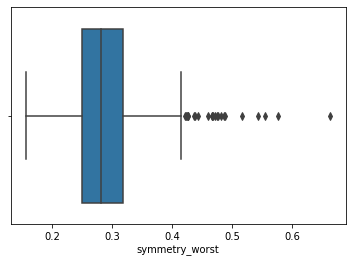

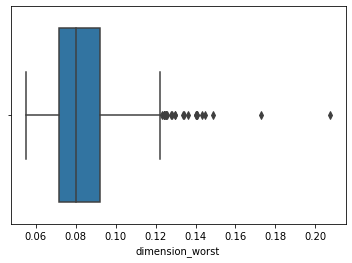

In [47]:
for i in bc.columns[1:]:
    sns.boxplot(bc[i])
    plt.show()

In [48]:

q1=bc.quantile(0.25)
q3=bc.quantile(0.75)
iqr=q3-q1
    
ub=q3+1.5*iqr
lb=q1-1.5*iqr
    
bc=bc[~((bc<lb)|(bc>ub)).any(axis=1)]

In [49]:
bc.shape

(398, 31)

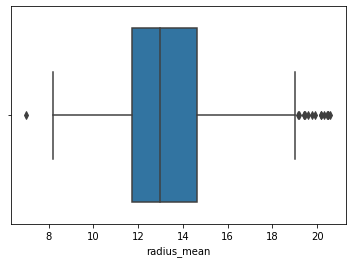

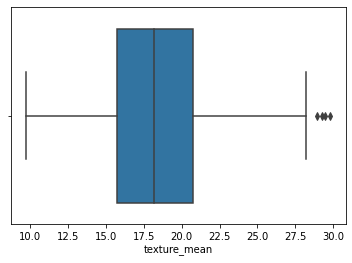

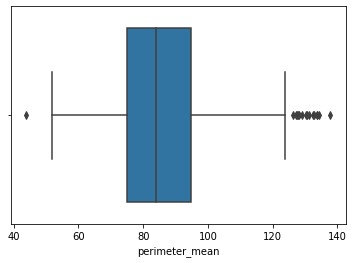

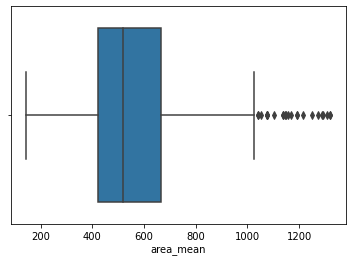

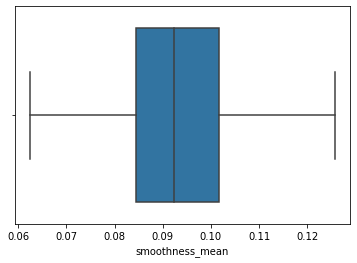

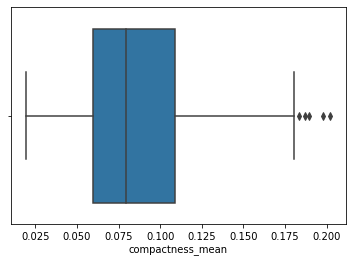

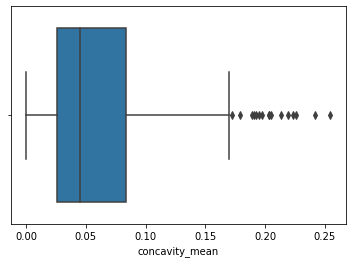

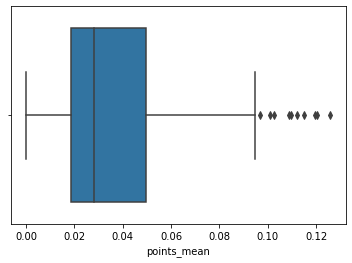

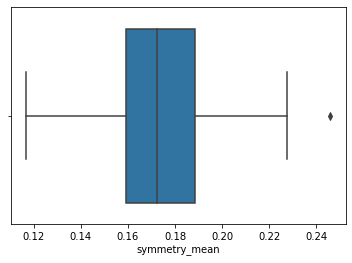

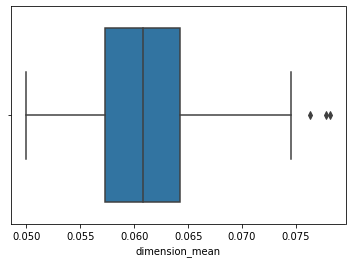

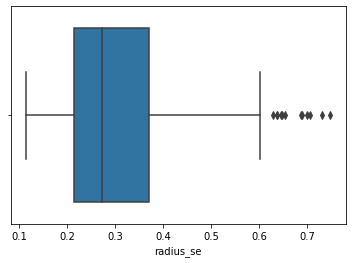

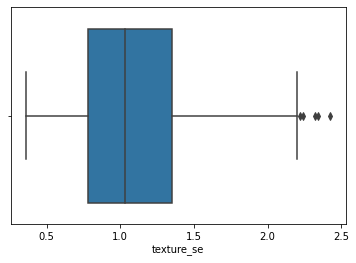

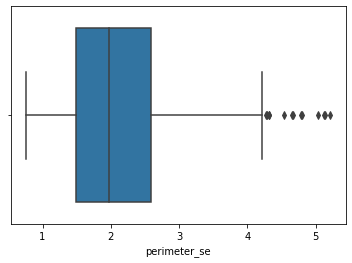

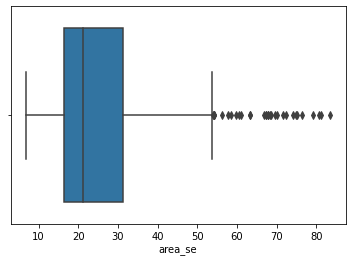

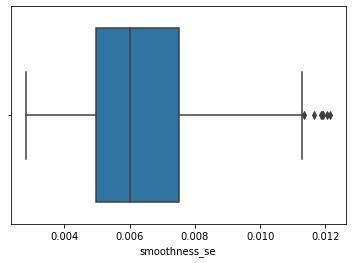

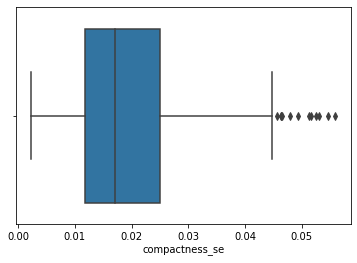

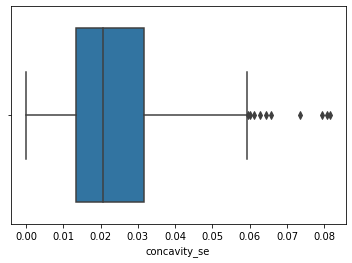

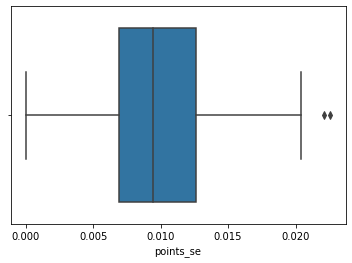

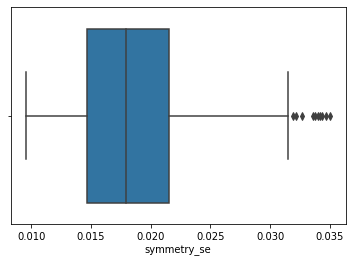

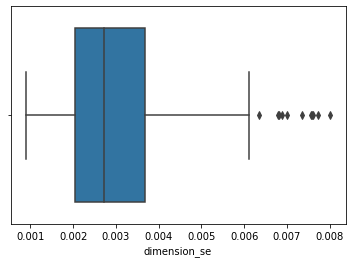

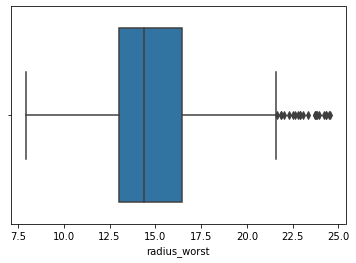

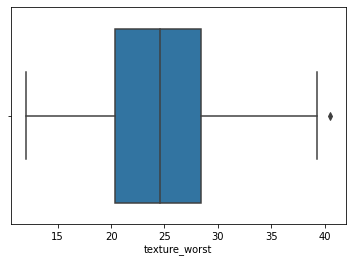

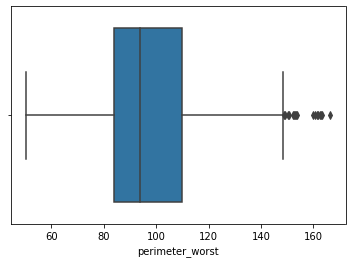

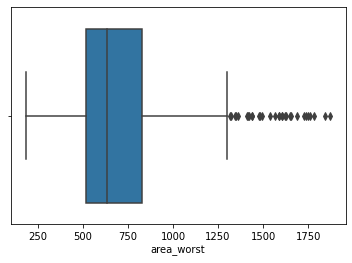

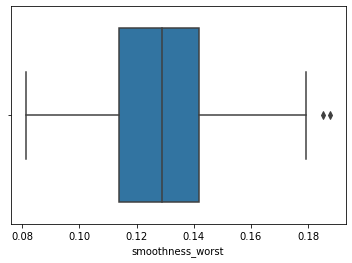

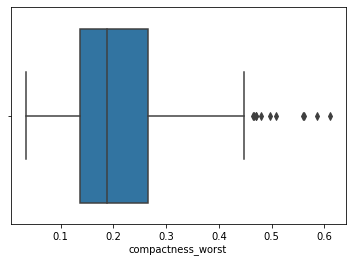

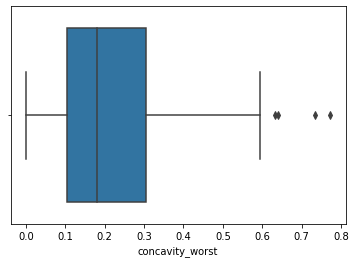

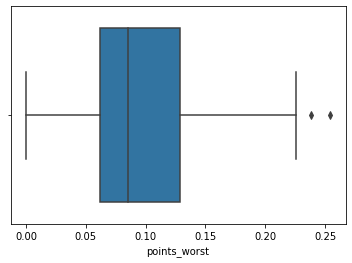

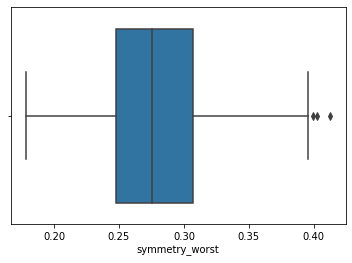

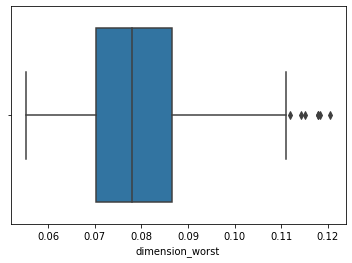

In [50]:
for i in bc.columns[1:]:
    sns.boxplot(bc[i])
    plt.show()

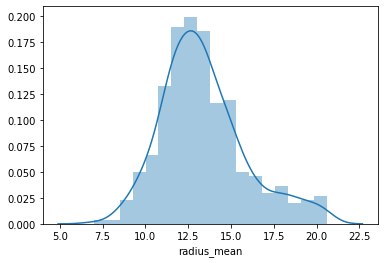

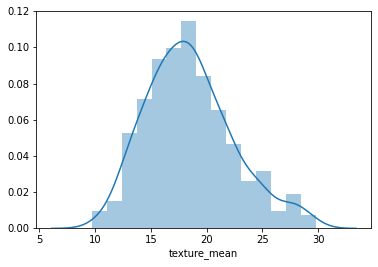

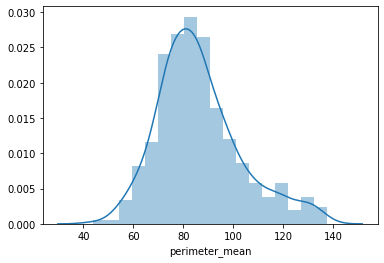

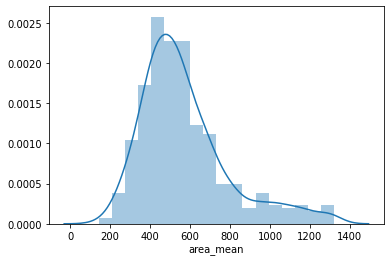

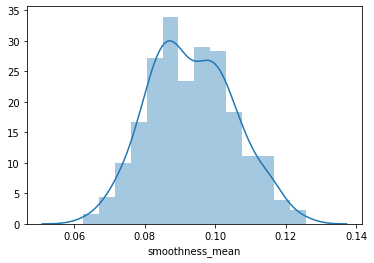

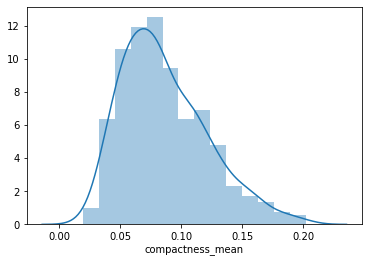

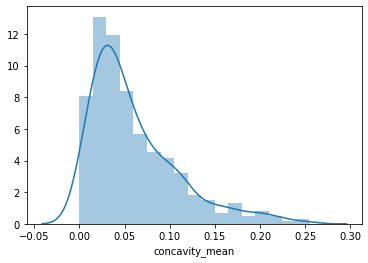

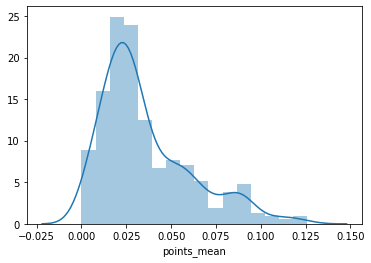

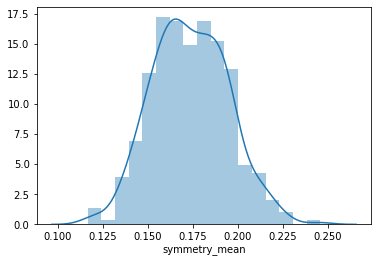

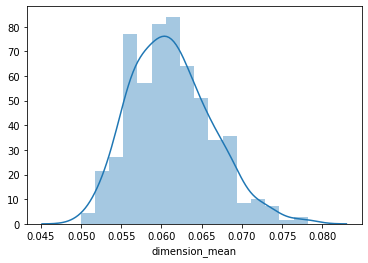

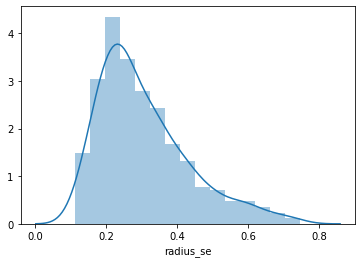

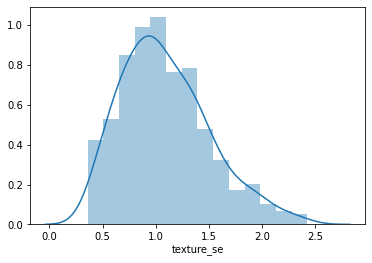

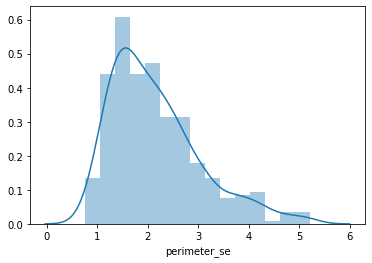

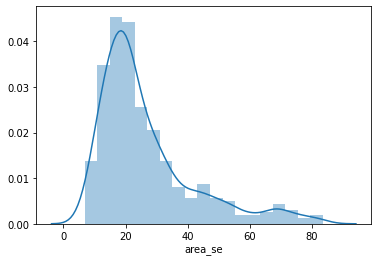

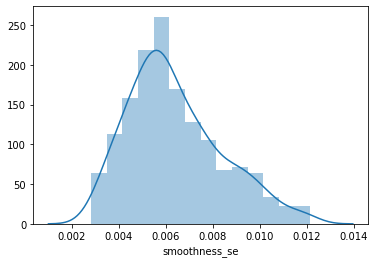

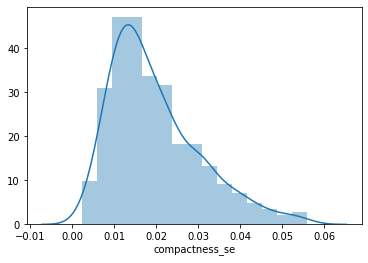

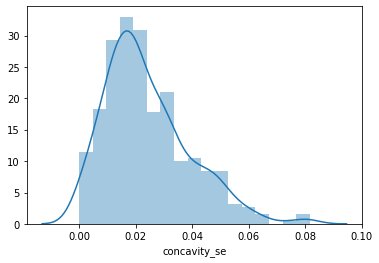

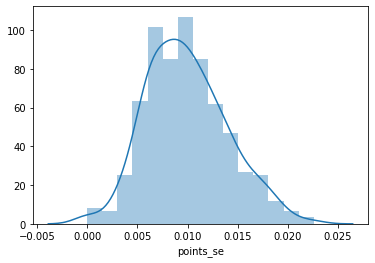

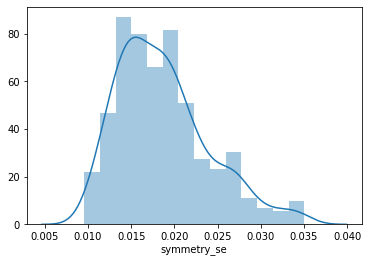

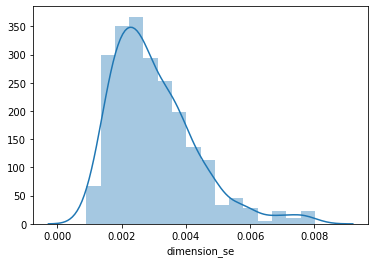

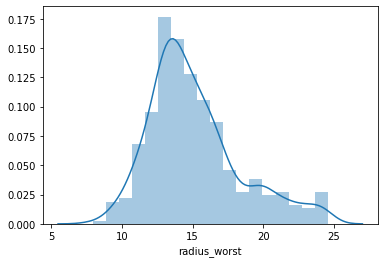

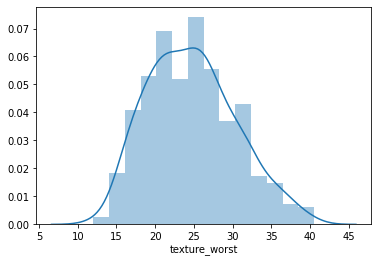

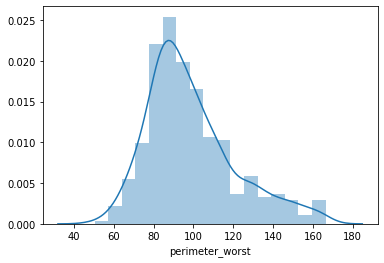

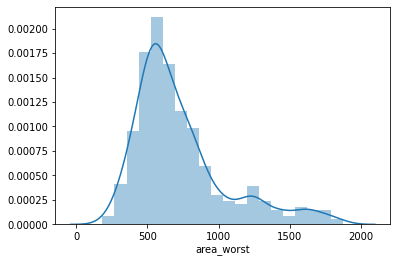

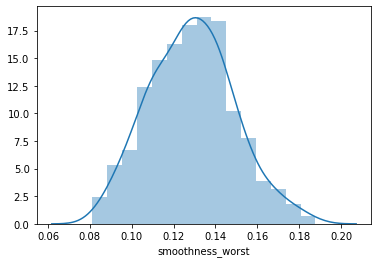

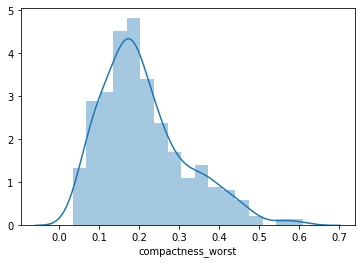

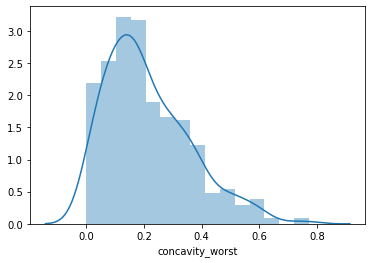

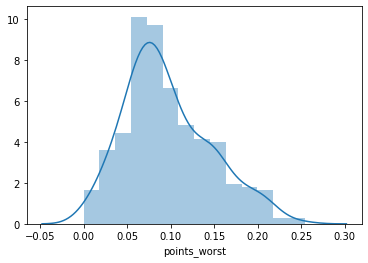

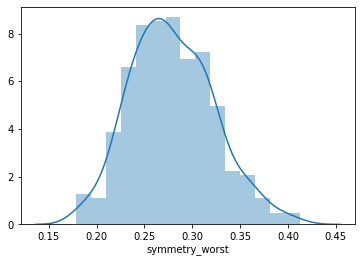

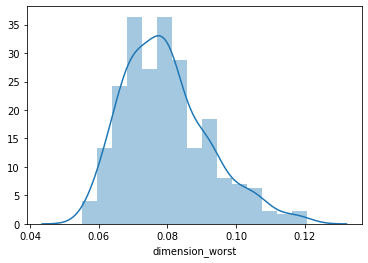

In [51]:
for i in bc.columns[1:]:
    sns.distplot(bc[i])
    plt.show()

In [52]:
print("We see a slight reduction in skewness after removing outliers.")

We see a slight reduction in skewness after removing outliers.


In [53]:
bc['diagnosis'].value_counts()

B    300
M     98
Name: diagnosis, dtype: int64

In [54]:
bc['diagnosis']=bc['diagnosis'].replace({'B':0,'M':1})
print("Encoding the labels for column 'diagnosis'.")

Encoding the labels for column 'diagnosis'.


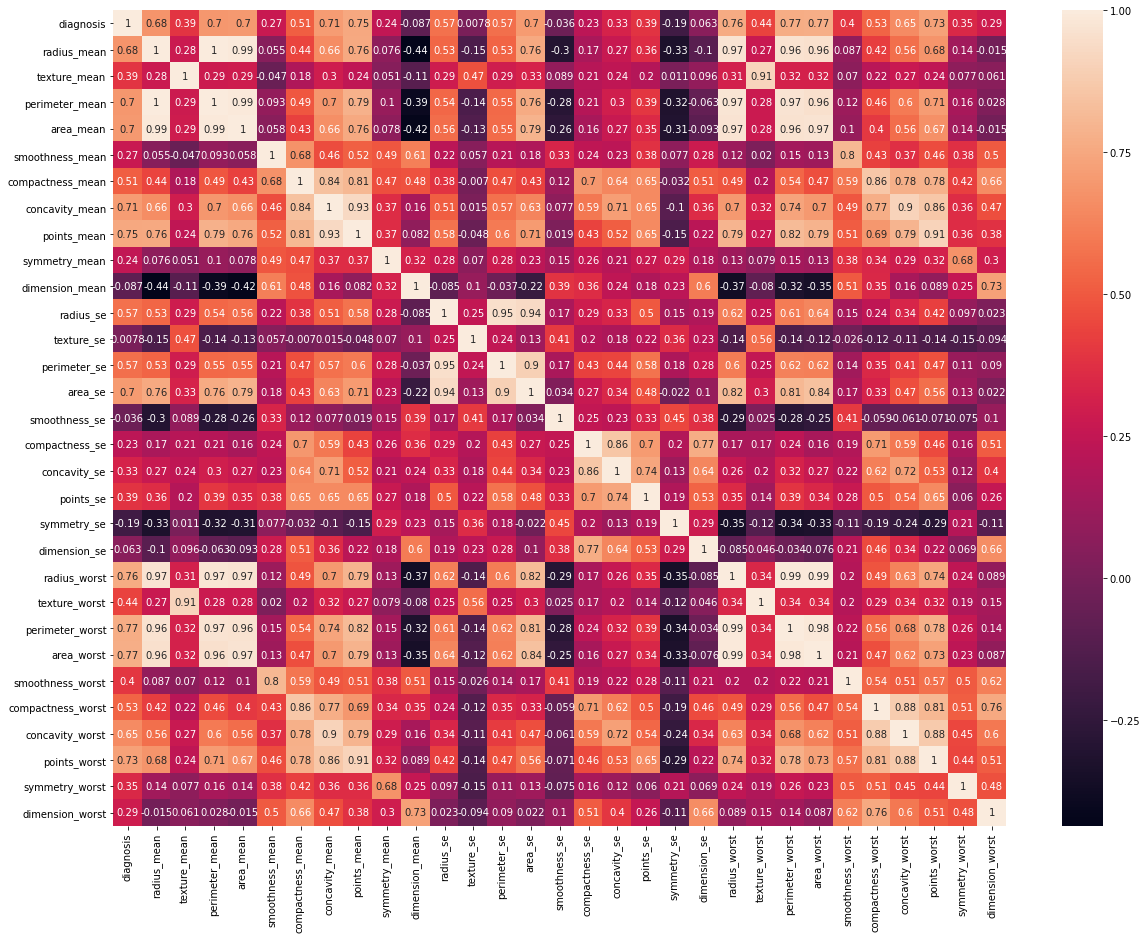

In [57]:
plt.figure(figsize=(20,15))
sns.heatmap(bc.corr(),annot=True)

In [59]:
print("Features with lowest correlation with target are: texture_se, smoothness_se, dimensions_se,dimension_mean, symmetry_se. \n We will check statistical significance for each of them.")

Features with lowest correlation with target are: texture_se, smoothness_se, dimensions_se,dimension_mean, symmetry_se. 
 We will check statistical significance for each of them.


In [60]:
bc0=bc[bc['diagnosis']==0]
bc1=bc[bc['diagnosis']==1]
print("We created two separate datasets for malignant and benign cancer patients.")

We created two separate datasets for malignant and benign cancer patients.


In [61]:
from scipy.stats import shapiro,ttest_ind, mannwhitneyu


In [62]:
#texture_se
ttest_ind(bc0['texture_se'],bc1['texture_se'])

Ttest_indResult(statistic=-0.15433439850018493, pvalue=0.8774247007995373)

In [63]:
mannwhitneyu(bc0['texture_se'],bc1['texture_se'])

MannwhitneyuResult(statistic=14193.0, pvalue=0.30422620127761174)

In [64]:
print("The feature 'texture_se' fails both parametric and non parametric test for significance. It means there is not significant difference in 'texture_se' for malignant and benign cancer patients. So we can drop this feature.")

The feature 'texture_se' fails both parametric and non parametric test for significance. It means there is not significant difference in 'texture_se' for malignant and benign cancer patients. So we can drop this feature.


In [65]:
#smoothness_se
ttest_ind(bc0['smoothness_se'],bc1['smoothness_se'])

Ttest_indResult(statistic=0.7174480795478391, pvalue=0.47352064850023146)

In [66]:
mannwhitneyu(bc0['smoothness_se'],bc1['smoothness_se'])

MannwhitneyuResult(statistic=14059.5, pvalue=0.25871642940043615)

In [67]:
print("The feature 'smoothness_se' fails both parametric and non parametric test for significance. It means there is not significant difference in 'smoothness_se' for malignant and benign cancer patients. So we can drop this feature.")

The feature 'smoothness_se' fails both parametric and non parametric test for significance. It means there is not significant difference in 'smoothness_se' for malignant and benign cancer patients. So we can drop this feature.


In [69]:
#dimensions_se
ttest_ind(bc0['dimension_se'],bc1['dimension_se'])

Ttest_indResult(statistic=-1.2521551257255767, pvalue=0.21125237515383888)

In [70]:
mannwhitneyu(bc0['dimension_se'],bc1['dimension_se'])

MannwhitneyuResult(statistic=12509.5, pvalue=0.013379828710459642)

In [71]:
print("The feature 'dimension_se' fails non-parametric test but clears the parametric test. This means if we transform the data the feature can be significant.")

The feature 'dimension_se' fails non-parametric test but clears the parametric test. This means if we transform the data the feature can be significant.


In [72]:
print("Since all other features have correlation greater than 'dimension_se' with the target, they can directly be considered as significant features.")

Since all other features have correlation greater than 'dimension_se' with the target, they can directly be considered as significant features.


In [73]:
bc=bc.drop(['texture_se','smoothness_se'], axis=1)

In [74]:
#Defining the input and output
inp=bc.drop('diagnosis',axis=1)
out=bc.diagnosis

In [82]:
#Scaling the data for analysis: though scaling is not mandatory for linear unregulated models, it is a good practice to scale the data before analysis. Only disadvantage is the interpretability of results. 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp_sc=sc.fit_transform(inp)
inp_sc=pd.DataFrame(inp_sc, columns=inp.columns)

In [92]:
#Next we define the estimator as Logistic Regression, fit the data and run it through 5 fold cross validation to get the accuracy score, bias error and variance error. 

In [108]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [109]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,inp_sc,out,scoring='roc_auc',cv=5)

In [110]:
accu_base=score.mean()
be_base=1-accu
ve_base=score.std()

In [111]:
accu_base,be_base,ve_base

(0.9888157894736842, 0.011184210526315796, 0.013585167893831919)

In [95]:
#Now we use GridSearchCV to find the best parameters for the KNN model. We compare the accuracy, bias error and variance error for base model and KNN model.

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(1,35),'weights':['uniform','distance']}

grid=GridSearchCV(knn, param_grid=param, cv=5,scoring='roc_auc')
grid.fit(inp_sc,out)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [103]:
grid.best_params_

{'n_neighbors': 34, 'weights': 'distance'}

In [104]:
knn=KNeighborsClassifier(n_neighbors=34,weights='distance')
score=cross_val_score(knn,inp_sc,out,scoring='roc_auc',cv=5)
accu_knn=score.mean()
be_knn=1-accu
ve_knn=score.std()

In [105]:
accu_knn,be_knn,ve_knn

(0.9850438596491229, 0.011184210526315796, 0.01480082185168715)

In [112]:
accu_base,be_base,ve_base

(0.9888157894736842, 0.011184210526315796, 0.013585167893831919)

In [113]:
df=pd.DataFrame()
df['knn']=[accu_knn,be_knn,ve_knn]
df['lr']=[accu_base,be_base,ve_base]
df.index=['Accuracy', 'Base Error','Variance Error']

In [114]:
df

,knn,lr
Accuracy,0.985044,0.988816
Base Error,0.011184,0.011184
Variance Error,0.014801,0.013585


In [115]:
print("We observe comparable performance for both the models with Logistic Regression model being slightly better.")

We observe comparable performance for both the models with Logistic Regression model being slightly better.
